In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [63]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [64]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/Flowers-Dataset/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [65]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/Flowers-Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",)

Found 4317 images belonging to 5 classes.


In [66]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [55]:
model=Sequential()

In [56]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [58]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 631s 4s/step - loss: 1.2806 - accuracy: 0.4677 - val_loss: 1.2946 - val_accuracy: 0.5071
Epoch 2/10
180/180 [==============================] - 65s 362ms/step - loss: 1.0476 - accuracy: 0.5830 - val_loss: 1.0625 - val_accuracy: 0.5872
Epoch 3/10
180/180 [==============================] - 65s 361ms/step - loss: 0.9709 - accuracy: 0.6171 - val_loss: 0.9472 - val_accuracy: 0.6426
Epoch 4/10
180/180 [==============================] - 64s 359ms/step - loss: 0.9256 - accuracy: 0.6426 - val_loss: 0.9009 - val_accuracy: 0.6491
Epoch 5/10
180/180 [==============================] - 65s 360ms/step - loss: 0.8915 - accuracy: 0.6597 - val_loss: 0.8129 - val_accuracy: 0.6831
Epoch 6/10
180/180 [==============================] - 65s 360ms/step - loss: 0.8523 - accuracy: 0.6694 - val_loss: 0.7816 - val_accuracy: 0.7042
Epoch 7/10
180/180 [==============================] - 65s 361ms/step - loss: 0.8149 - accuracy: 0.6873 - val_loss: 0.7410 - val_accu

In [67]:
model.save('IBM_flowers.h5')

In [68]:
pwd

'/content'

In [69]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [70]:
model=load_model('IBM_flowers.h5')

In [76]:
img=image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/13911047024_8966d70560_n.jpg')

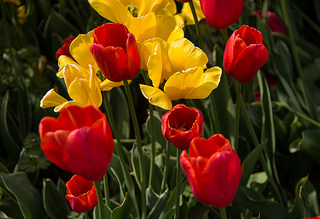

In [77]:
img

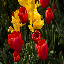

In [78]:
img=image.load_img(r'/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/13911047024_8966d70560_n.jpg',target_size=(64,64))
img

In [79]:
x=image.img_to_array(img)
x

array([[[ 21.,  21.,   0.],
        [ 46.,  26.,   0.],
        [ 78.,  52.,   1.],
        ...,
        [  4.,   5.,   0.],
        [  0.,   0.,   0.],
        [ 14.,  22.,   9.]],

       [[ 21.,  23.,   1.],
        [ 13.,  14.,   0.],
        [ 29.,  35.,   9.],
        ...,
        [  3.,   3.,   1.],
        [  0.,   1.,   0.],
        [ 18.,  24.,  12.]],

       [[ 22.,  26.,   3.],
        [ 14.,  19.,   0.],
        [ 29.,  29.,   3.],
        ...,
        [  2.,   3.,   0.],
        [  0.,   0.,   0.],
        [ 22.,  24.,  13.]],

       ...,

       [[  0.,  11.,   3.],
        [ 19.,  20.,   2.],
        [ 15.,  19.,   2.],
        ...,
        [ 30.,  39.,  20.],
        [ 21.,  30.,  13.],
        [ 70.,  83.,  55.]],

       [[116., 116.,  90.],
        [ 15.,  27.,   7.],
        [ 14.,  18.,   3.],
        ...,
        [ 36.,  44.,  23.],
        [ 25.,  32.,  16.],
        [ 63.,  85.,  47.]],

       [[ 72.,  87.,  56.],
        [150., 124.,  91.],
        [ 14.,  

In [80]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 21.,  21.,   0.],
         [ 46.,  26.,   0.],
         [ 78.,  52.,   1.],
         ...,
         [  4.,   5.,   0.],
         [  0.,   0.,   0.],
         [ 14.,  22.,   9.]],

        [[ 21.,  23.,   1.],
         [ 13.,  14.,   0.],
         [ 29.,  35.,   9.],
         ...,
         [  3.,   3.,   1.],
         [  0.,   1.,   0.],
         [ 18.,  24.,  12.]],

        [[ 22.,  26.,   3.],
         [ 14.,  19.,   0.],
         [ 29.,  29.,   3.],
         ...,
         [  2.,   3.,   0.],
         [  0.,   0.,   0.],
         [ 22.,  24.,  13.]],

        ...,

        [[  0.,  11.,   3.],
         [ 19.,  20.,   2.],
         [ 15.,  19.,   2.],
         ...,
         [ 30.,  39.,  20.],
         [ 21.,  30.,  13.],
         [ 70.,  83.,  55.]],

        [[116., 116.,  90.],
         [ 15.,  27.,   7.],
         [ 14.,  18.,   3.],
         ...,
         [ 36.,  44.,  23.],
         [ 25.,  32.,  16.],
         [ 63.,  85.,  47.]],

        [[ 72.,  87.,  56.],
       

In [81]:
y=np.argmax(model.predict(x),axis=1)
y

array([4])

In [82]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [83]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [84]:
index[y[0]]

'tulip'